# A study of monitoring water flowing in the Cimarron River near Ripley, OK

Oklahoma city southeast

In [1]:
import os,datetime,pickle,numpy
from matplotlib import pyplot as plt
from pyhspf.preprocessing import NWISExtractor


gageid='07241550'
NWIS = 'NWIS-metadata'
watershed_HUC8='11100302'
directory = 'DATA-{}'.format(watershed_HUC8)

nwisextractor = NWISExtractor(NWIS)   #check the NWIS folder, see if it exists.


destination directory does not exist



In [6]:
#download the metadata information of entire gagestations in USA.
#and extract selected metadata information into created 'DATA' forlder.
nwisextractor.extract_HUC8(watershed_HUC8, directory) 


NWIS directory NWIS-metadata exists

NWIS source metadata file NWIS-metadata/USGS_Streamgages-NHD_Locations_Shape.zip is present

gage metadata NWIS-metadata/USGS_Streamgages-NHD_Locations is present

extracting gage stations in 11100302 to DATA-11100302/gagestations

successfully extracted NWIS gage stations



In [8]:
start = datetime.datetime(1960, 1, 1)      # start date for timeseries
end   = datetime.datetime(2020, 1, 1)      # end date for timeseries
gagepath='{}/gagedata'.format(directory)
if not os.path.isdir(gagepath):
    nwisextractor.download_all(start, end, output = gagepath)
    
gagedata  = 'North Canadian River near Harrah'
nwisextractor.download_gagedata(gageid, start, end, output = gagedata)
print('End download')

gage data for 07241550 exist

End download


In [9]:
p = '{}/{}'.format(gagepath,gageid)    #identify p as the picked_gageid file 
                                           #under 'data-curves' folder.
with open(p, 'rb') as f:      #open p file and ensure the file is 'clean up' 
                              #after finish the process
        
    station = pickle.load(f)      #to load pickled data from p file
    
print('The water flow information for the {}'.format(station.name))
print('')
# the following are attributes of the station directly from the database
print('Gage ID:                     ', station.gageid)
print('Name:                        ', station.name)
print('State:                       ', station.state)
print('First day of measurement:    ', station.day1)
print('Last day of measurement:     ', station.dayn)
print('Drainage area (square miles):', station.drain)
print('Average flow (cfs):          ', station.ave)
print('NWIS url:                    ', station.web)

The water flow information for the North Canadian River near Harrah, OK

Gage ID:                      07241550
Name:                         North Canadian River near Harrah, OK
State:                        OK
First day of measurement:     19681001
Last day of measurement:      20040930
Drainage area (square miles): 13501.0
Average flow (cfs):           481.668
NWIS url:                     http://waterdata.usgs.gov/nwis/nwisman/?site_no=07241550


The hydrograph and flow duration curve for site 07241550 in 2019


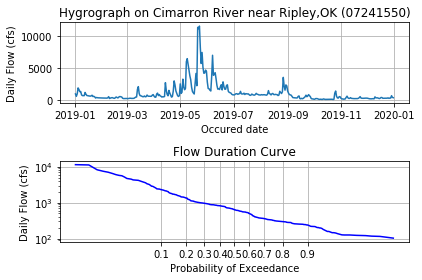

Maximum flow (cfs):        11600.0
Maximum flow occur at:     2019-05-23 00:00:00


In [10]:
s = datetime.datetime(2019, 1, 1)  # Start date 
e = datetime.datetime(2020, 1, 1)   # End date

data = station.make_timeseries(start = s, end = e)
deltat=datetime.timedelta(days=1)
  
a=[]
print('The hydrograph and flow duration curve for site {} in {}'.format(gageid,s.year))
for i in range(len(data)):
    a.append(s+i*deltat)

s1=plt.subplot(211)
s1.set_title('Hygrograph on Cimarron River near Ripley,OK ({})'.format(gageid))
s1.set_ylabel('Daily Flow (cfs)')
s1.set_xlabel('Occured date')
s1.plot(a,data)
plt.grid(True)

from scipy import stats
norm = stats.norm(0,1)
ticks = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
norm_ticks = [norm.ppf(t) for t in ticks]    #Percent Points based on giving ticks


data1=data.copy()   # copy the array values from old one
data1.sort()       #rearrange array values from small to large
s2=plt.subplot(212)
s2.set_title('Flow Duration Curve')
s2.set_yscale('log')
s2.set_ylabel('Daily Flow (cfs)')
s2.set_xlabel('Probability of Exceedance')
s2.xaxis.set_ticks(norm_ticks)
s2.set_xticklabels(ticks)
daily=[norm.ppf(L/len(data1)) for L in range(len(data1))]
daily.reverse()
s2.plot(daily, data1, '-', color = 'blue')
plt.grid(True)
plt.tight_layout()
plt.show()


print('Maximum flow (cfs):       ', numpy.amax(data))
position = data.index(numpy.amax(data))  #find the MAX.occur position in the array
t_position=deltat*position+s

print('Maximum flow occur at:    ', t_position)

In [11]:
s_max=datetime.datetime(1969, 1, 1)
e_max=datetime.datetime(2020, 1, 1)
max_data=station.make_timeseries(start = s_max, end = e_max)
print('Historical maximum flow (cfs):       ', numpy.amax(max_data))
position_max = max_data.index(numpy.amax(max_data))  #find the MAX.occur position in the array
t_position_max=deltat*position_max+s_max
print('Historical maximum flow occur at:    ', t_position_max)

Historical maximum flow (cfs):        20000.0
Historical maximum flow occur at:     1987-05-29 00:00:00


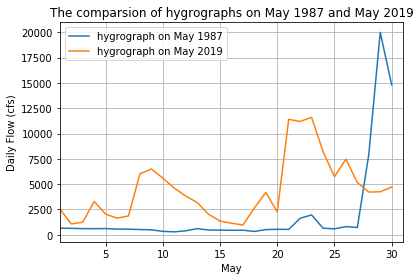

In [12]:
s_may=datetime.datetime(1987, 5, 1)
e_may=datetime.datetime(1987, 5, 31)
may_data=station.make_timeseries(start = s_may, end = e_may)
s_may2=datetime.datetime(2019, 5, 1)
e_may2=datetime.datetime(2019, 5, 31)
may2_data=station.make_timeseries(start = s_may2, end = e_may2)
a1=[]
for w in range(1,len(may_data)+1):
    a1.append(w)
s3=plt.subplot(111)
s3.set_title('The comparsion of hygrographs on May {} and May {}'.format(s_may.year,s_may2.year))
s3.set_ylabel('Daily Flow (cfs)')
s3.set_xlabel('May')
s3.plot(a1,may_data,label='hygrograph on May {}'.format(s_may.year))
s3.plot(a1,may2_data,label='hygrograph on May {}'.format(s_may2.year))
plt.xlim(1,31)
leg=s3.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

25 year flow duration cpmparsion

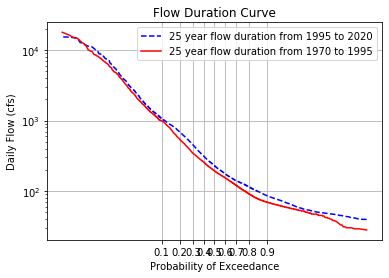

In [13]:
s_25=datetime.datetime(end.year-25, 1, 1)
e_25=end
s2_25=datetime.datetime(s_25.year-25, 1, 1)
e2_25=s_25
data2=station.make_timeseries(start = s_25, end = e_25) 
data2.sort()
data3=station.make_timeseries(start = s2_25, end = e2_25)
data3.sort()

s4=plt.subplot(111)
s4.set_title('Flow Duration Curve')
s4.set_yscale('log')
s4.set_ylabel('Daily Flow (cfs)')
s4.set_xlabel('Probability of Exceedance')
s4.xaxis.set_ticks(norm_ticks)
s4.set_xticklabels(ticks)
daily_ppf=[norm.ppf(i1/len(data2)) for i1 in range(len(data2))]
daily_ppf.reverse()
#daily_ppf1=[norm.ppf(i1/len(data3)) for i1 in range(len(data3))]
#daily_ppf1.reverse()
s4.plot(daily_ppf, data2, '--', color = 'blue',
        label='25 year flow duration from {} to {}'.format(s_25.year,e_25.year))

s4.plot(daily_ppf, data3, '-', color = 'red',
        label='25 year flow duration from {} to {}'.format(s2_25.year,e2_25.year))
leg=s4.legend()
plt.grid(True)
plt.show()

http://www.mesonet.org/index.php/weather/daily_data_retrieval

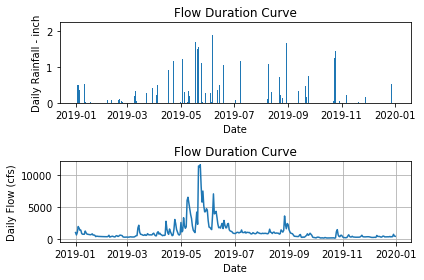

In [14]:
import csv
filename='67333754.csv'

with open (filename, 'r') as f: 
    reader=csv.reader(f)
    headers=next(reader)
    rain=[]
    dates=[]
    for row in reader:
        dates.append(datetime.datetime(int(row[0]),int(row[1]),int(row[2])))
        rain.append(float(row[4]))
    

sub=plt.subplot(211)
sub.set_title('Flow Duration Curve')
sub.set_ylabel('Daily Rainfall - inch')
sub.set_xlabel('Date')
sub.bar(dates,rain)

sub2=plt.subplot(212)
sub2.set_title('Flow Duration Curve')
sub2.set_ylabel('Daily Flow (cfs)')
sub2.set_xlabel('Date')
sub2.plot(a,data)

plt.grid(True)
plt.tight_layout()
plt.show()
